RNNは内部ループを持つニューラルネットワークの一種。<br>
RNNはシーケンスの要素を内部ループで処理する。<br>

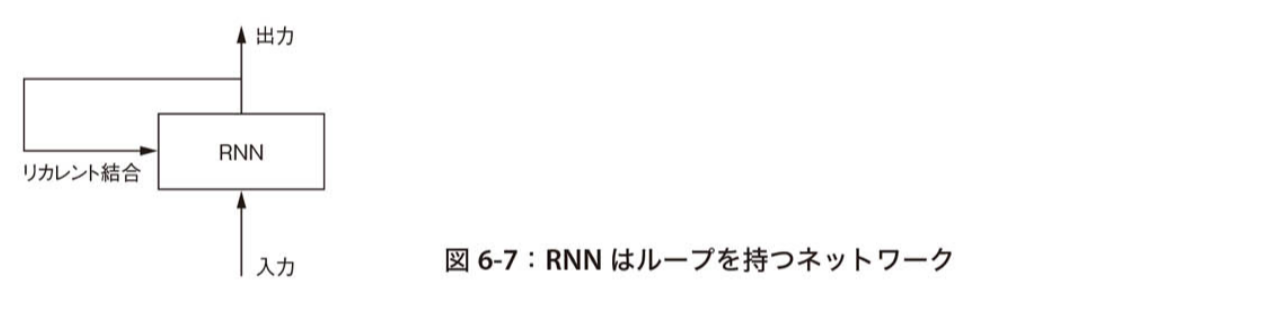

In [2]:
# 画像の表示
from IPython.display import Image
Image(filename='02.png', width=600)

### 単純なRNNのnumpy実装

In [12]:
import numpy as np

timesteps = 10 # 入力シーケンスの時間刻みの数
input_features = 32 # 入力特徴空間の次元の数
output_features = 64 # 出力特徴空間の次元の数

# 入力データ : ランダムにノイズを挿入
inputs = np.random.random((timesteps, input_features))
# print(len(inputs))

# 初期状態 : すべて0のベクトル
state_t = np.zeros((output_features, ))

# ランダムな重み
W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = list()

# input_tは形状が(inputs_features,)のベクトル
for input_t in inputs:
    # 入力と現在の状態(１つ前の出力)を結合して現在の出力を取得
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    # この出力をリストに格納
    successive_outputs.append(output_t)
    # 次の時間刻みのためにRNNの状態を更新
    state_t  = output_t
    
# 最終的な出力は形状が(timesteps, output_features)の２次元テンソル
final_outputs_sequence = np.stack(successive_outputs, axis=0)

# len(final_outputs_sequence)

### Kerasでのリカレント層

Kerasでのリカレント層をIMDbのデータに当てはめる。<br>

まずはデータの前処理<br>

In [15]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000 # 特徴量として考慮する単語の数
max_len = 500 # この数の単語を残してテキストをカット
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) =\
    imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences(sample × times)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape:', input_train.shape)
print('input_test shape', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
218
Pad sequences(sample × times)
input_train shape: (25000, 500)
input_test shape (25000, 500)


Embedding層とSimpleRNN層を使って単純なRNNを訓練する。<br>

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss = 'binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 25s 1ms/step - loss: 0.6455 - acc: 0.6102 - val_loss: 0.5591 - val_acc: 0.7122
Epoch 2/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.4525 - acc: 0.7928 - val_loss: 0.5087 - val_acc: 0.7716
Epoch 3/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.3197 - acc: 0.8708 - val_loss: 0.3738 - val_acc: 0.8464
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2219 - acc: 0.9143 - val_loss: 0.3757 - val_acc: 0.8524
Epoch 5/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1580 - acc: 0.9431 - val_loss: 0.4241 - val_acc: 0.8618
Epoch 6/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.1017 - acc: 0.9664 - val_loss: 0.4294 - val_acc: 0.8428
Epoch 7/10
20000/20000 [==============================] - 27s 1ms/step - loss: 0.0641 - acc: 0.9793 - val_loss: 0.5036 - val_acc:

<Figure size 432x288 with 0 Axes>

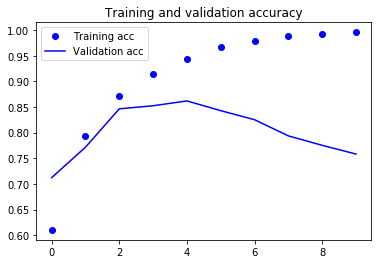

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

# 正解率をプロット
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

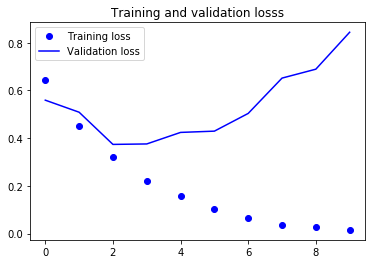

In [20]:
# 損失値をプロット
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation losss')
plt.legend()